In [58]:
# Optimizing Code Performance On Large Datasets

In [1]:
import pandas as pd
import numpy as np 


In [2]:
moma = pd.read_csv('data/moma.csv')
moma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34558 entries, 0 to 34557
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ExhibitionID            34129 non-null  float64
 1   ExhibitionNumber        34558 non-null  object 
 2   ExhibitionTitle         34558 non-null  object 
 3   ExhibitionCitationDate  34557 non-null  object 
 4   ExhibitionBeginDate     34558 non-null  object 
 5   ExhibitionEndDate       33354 non-null  object 
 6   ExhibitionSortOrder     34558 non-null  float64
 7   ExhibitionURL           34125 non-null  object 
 8   ExhibitionRole          34424 non-null  object 
 9   ConstituentID           34044 non-null  float64
 10  ConstituentType         34424 non-null  object 
 11  DisplayName             34424 non-null  object 
 12  AlphaSort               34424 non-null  object 
 13  FirstName               31499 non-null  object 
 14  MiddleName              3804 non-null 

In [4]:
people = pd.read_csv('data/people.csv')
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    4 non-null      object 
 1   Age     4 non-null      int64  
 2   Weight  4 non-null      int64  
 3   Height  4 non-null      float64
 4   Gender  4 non-null      object 
dtypes: float64(1), int64(2), object(2)
memory usage: 288.0+ bytes


In [13]:
# verify the minimum and maximum values for each integer subtype
print(np.iinfo('int8').min)
print(np.iinfo('int8').max)

-128
127


In [15]:
# verify the minimum and maximum values for each float subtype
print(np.finfo('float16').min)
print(np.finfo('float16').max)

-65500.0
65500.0


In [17]:
# display the deep memory footprint of each column
print(people.memory_usage(deep=True))

Index     128
Name      245
Age        32
Weight     32
Height     32
Gender    232
dtype: int64


In [19]:
# If we want to get a dataframe containing only the columns with the object datatype 
obj_cols = people.select_dtypes(include=['object'])
print(obj_cols)

     Name Gender
0    Rita      F
1  Dexter      M
2    Anna      F
3     Bob      M


In [22]:
obj_cols = moma.select_dtypes(include=['object'])
obj_cols_mem1 = obj_cols.memory_usage(deep=True)
obj_cols_sum = obj_cols_mem1.sum() / 2**20
print(obj_cols_sum,'MB')

43.76634883880615 MB


In [28]:
print(moma.info())
print('\n--------------------------------------------------\n')
print(moma.info(memory_usage="deep"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34558 entries, 0 to 34557
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ExhibitionID            34129 non-null  float64
 1   ExhibitionNumber        34558 non-null  object 
 2   ExhibitionTitle         34558 non-null  object 
 3   ExhibitionCitationDate  34557 non-null  object 
 4   ExhibitionBeginDate     34558 non-null  object 
 5   ExhibitionEndDate       33354 non-null  object 
 6   ExhibitionSortOrder     34558 non-null  float64
 7   ExhibitionURL           34125 non-null  object 
 8   ExhibitionRole          34424 non-null  object 
 9   ConstituentID           34044 non-null  float64
 10  ConstituentType         34424 non-null  object 
 11  DisplayName             34424 non-null  object 
 12  AlphaSort               34424 non-null  object 
 13  FirstName               31499 non-null  object 
 14  MiddleName              3804 non-null 

In [30]:
# private attribute to retrieve the underlying BlockManager instance and display it using the print() function
print(moma._data)

BlockManager
Items: Index(['ExhibitionID', 'ExhibitionNumber', 'ExhibitionTitle',
       'ExhibitionCitationDate', 'ExhibitionBeginDate', 'ExhibitionEndDate',
       'ExhibitionSortOrder', 'ExhibitionURL', 'ExhibitionRole',
       'ConstituentID', 'ConstituentType', 'DisplayName', 'AlphaSort',
       'FirstName', 'MiddleName', 'LastName', 'Suffix', 'Institution',
       'Nationality', 'ConstituentBeginDate', 'ConstituentEndDate',
       'ArtistBio', 'Gender', 'VIAFID', 'WikidataID', 'ULANID',
       'ConstituentURL'],
      dtype='object')
Axis 1: RangeIndex(start=0, stop=34558, step=1)
FloatBlock: [ 0  6  9 19 20 23 25], 7 x 34558, dtype: float64
ObjectBlock: [ 1  2  3  4  5  7  8 10 11 12 13 14 15 16 17 18 21 22 24 26], 20 x 34558, dtype: object


In [33]:
def change_to_int(df, col_name):
    # Get the minimum and maximum values
    col_max = df[col_name].max()
    col_min = df[col_name].min()
    # Find the datatype
    for dtype_name in ['int8', 'int16', 'int32', 'int64']:
        # Check if this datatype can hold all values
        if col_max <  np.iinfo(dtype_name).max and col_min > np.iinfo(dtype_name).min:
            df[col_name] = df[col_name].astype(dtype_name)
            break

float_moma = moma.select_dtypes(include=['float64'])
print(float_moma.isnull().sum())
# By running we got that ExhibitionSortOrder has no missing values
change_to_int(moma, 'ExhibitionSortOrder')
print(moma['ExhibitionSortOrder'].dtype)

ExhibitionID              429
ExhibitionSortOrder         0
ConstituentID             514
ConstituentBeginDate     9268
ConstituentEndDate      14739
VIAFID                   7562
ULANID                  12870
dtype: int64
int16


In [35]:
# Reset the dataframe to original CSV
moma = pd.read_csv("data/moma.csv")
moma['ExhibitionSortOrder'] = moma['ExhibitionSortOrder'].astype('int')
moma['ExhibitionSortOrder'] = pd.to_numeric(moma['ExhibitionSortOrder'], downcast='integer')
print(moma['ExhibitionSortOrder'].dtype)

int16


In [37]:
# Optimizing Float Columns with Subtypes
float_cols = moma.select_dtypes(include=['float']).columns

for col in float_cols:
    moma[col] = pd.to_numeric(moma[col], downcast='float')

In [38]:
#Converting to DataTime
moma["ExhibitionBeginDate"] = pd.to_datetime(moma["ExhibitionBeginDate"])
moma["ExhibitionEndDate"] = pd.to_datetime(moma["ExhibitionEndDate"])

print(moma[["ExhibitionBeginDate", "ExhibitionEndDate"]].memory_usage(deep=True))

Index                     128
ExhibitionBeginDate    276464
ExhibitionEndDate      276464
dtype: int64


In [39]:
#Converting to Categorical to Save Memory
moma['ConstituentType'] = moma['ConstituentType'].astype('category')
print(moma['ConstituentType'].memory_usage(deep=True))

34901


In [40]:
'''We should stick to using the category type primarily for object columns where less than 50% of the values are unique. If all of the values in a column are unique, the category type will end up using more memory. That's because the column is storing all of the raw string values in addition to the integer category codes.'''

"We should stick to using the category type primarily for object columns where less than 50% of the values are unique. If all of the values in a column are unique, the category type will end up using more memory. That's because the column is storing all of the raw string values in addition to the integer category codes."

In [41]:
# Convert all object columns where less than half of the column's values are unique to the category dtype.
for col in moma.select_dtypes(include=['object']):
    num_unique_values = len(moma[col].unique())
    num_total_values = len(moma[col])
    if num_unique_values / num_total_values < 0.5:
        moma[col] = moma[col].astype('category')
        
print(moma.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34558 entries, 0 to 34557
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ExhibitionID            34129 non-null  float32       
 1   ExhibitionNumber        34558 non-null  category      
 2   ExhibitionTitle         34558 non-null  category      
 3   ExhibitionCitationDate  34557 non-null  category      
 4   ExhibitionBeginDate     34558 non-null  datetime64[ns]
 5   ExhibitionEndDate       33354 non-null  datetime64[ns]
 6   ExhibitionSortOrder     34558 non-null  int16         
 7   ExhibitionURL           34125 non-null  category      
 8   ExhibitionRole          34424 non-null  category      
 9   ConstituentID           34044 non-null  float32       
 10  ConstituentType         34424 non-null  category      
 11  DisplayName             34424 non-null  category      
 12  AlphaSort               34424 non-null  catego

# Processing DataFrames in Chunks

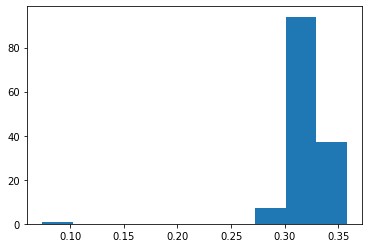

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

memory_footprints = []
chunk_iter = pd.read_csv("data/moma.csv", chunksize=250)
for chunk in chunk_iter:
    memory_footprints.append(chunk.memory_usage(deep=True).sum()/(1024*1024))

plt.hist(memory_footprints)
plt.show()

In [44]:
# Counting Across Chunks
num_rows = 0
chunk_iter = pd.read_csv("data/moma.csv", chunksize=250)
for chunk in chunk_iter:
    num_rows += len(chunk)
print(num_rows)

34558


In [46]:
# Batch Processing
dtypes = {"ConstituentBeginDate": "float", "ConstituentEndDate": "float"}
chunk_iter = pd.read_csv("data/moma.csv", chunksize=250, dtype=dtypes)
lifespans = []
for chunk in chunk_iter:
    diff = chunk['ConstituentEndDate'] - chunk['ConstituentBeginDate']
    lifespans.append(diff)
lifespans_dist = pd.concat(lifespans)
print(lifespans_dist)

0        79.0
1        67.0
2        55.0
3        37.0
4        32.0
         ... 
34553     NaN
34554     NaN
34555     NaN
34556     NaN
34557     NaN
Length: 34558, dtype: float64


In [48]:
# Counting Unique Values
chunk_iter = pd.read_csv("data/moma.csv", chunksize=250, usecols=['Gender'])
overall_vc = list()
for chunk in chunk_iter:
    chunk_vc = chunk['Gender'].value_counts()
    overall_vc.append(chunk_vc)
combined_vc = pd.concat(overall_vc)
print(combined_vc)

Male      208
Female      9
Male      193
Female      6
Male      195
         ... 
Male      186
Female     23
Male      195
Female     30
Male       53
Name: Gender, Length: 278, dtype: int64


In [49]:
chunk_iter = pd.read_csv("data/moma.csv", chunksize=250, usecols=['Gender'])
overall_vc = list()
for chunk in chunk_iter:
    chunk_vc = chunk['Gender'].value_counts()
    overall_vc.append(chunk_vc)
combined_vc = pd.concat(overall_vc)
final_vc = combined_vc.groupby(combined_vc.index).sum()
print(final_vc)

Female     2527
Male      23268
male          1
Name: Gender, dtype: int64


In [50]:
moma = pd.read_csv("data/moma.csv", usecols=['ExhibitionID', 'Gender'])
id_gender_counts = moma['Gender'].groupby(moma['ExhibitionID']).value_counts()
print(id_gender_counts)

ExhibitionID  Gender
2.0           Male       1
5.0           Male       3
6.0           Male      32
              Female     2
7.0           Male      69
                        ..
10799.0       Male      21
              Female     8
10800.0       Male       7
              Female     2
11267.0       Male       1
Name: Gender, Length: 2214, dtype: int64


In [51]:
chunk_iter = pd.read_csv("data/moma.csv", chunksize=250)
df_list = []
for chunk in chunk_iter:
    temp = chunk['Gender'].groupby(chunk['ExhibitionID']).value_counts()
    df_list.append(temp)
final_df = pd.concat(df_list)
id_gender_counts = final_df.groupby(final_df.index).sum()

# Augmenting Pandas with SQLite

In [52]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('moma.db')
moma_iter = pd.read_csv('data/moma.csv', chunksize=1000)
for chunk in moma_iter:
    chunk.to_sql("exhibitions", conn, if_exists='append', index=False)

In [54]:
# SQLite data Types
results_df = pd.read_sql('PRAGMA table_info(exhibitions);', conn)
print(results_df)

    cid                    name     type  notnull dflt_value  pk
0     0            ExhibitionID  INTEGER        0       None   0
1     1        ExhibitionNumber     TEXT        0       None   0
2     2         ExhibitionTitle     TEXT        0       None   0
3     3  ExhibitionCitationDate     TEXT        0       None   0
4     4     ExhibitionBeginDate     TEXT        0       None   0
5     5       ExhibitionEndDate     TEXT        0       None   0
6     6     ExhibitionSortOrder  INTEGER        0       None   0
7     7           ExhibitionURL     TEXT        0       None   0
8     8          ExhibitionRole     TEXT        0       None   0
9     9           ConstituentID     REAL        0       None   0
10   10         ConstituentType     TEXT        0       None   0
11   11             DisplayName     TEXT        0       None   0
12   12               AlphaSort     TEXT        0       None   0
13   13               FirstName     TEXT        0       None   0
14   14              Midd

In [55]:
moma_iter = pd.read_csv('data/moma.csv', chunksize=1000)
for chunk in moma_iter:
    chunk['ExhibitionSortOrder'] = chunk['ExhibitionSortOrder'].astype('int16')
    chunk.to_sql("exhibitions", conn, if_exists='append', index=False)
results_df = pd.read_sql('PRAGMA table_info(exhibitions);', conn)
print(results_df)

    cid                    name     type  notnull dflt_value  pk
0     0            ExhibitionID  INTEGER        0       None   0
1     1        ExhibitionNumber     TEXT        0       None   0
2     2         ExhibitionTitle     TEXT        0       None   0
3     3  ExhibitionCitationDate     TEXT        0       None   0
4     4     ExhibitionBeginDate     TEXT        0       None   0
5     5       ExhibitionEndDate     TEXT        0       None   0
6     6     ExhibitionSortOrder  INTEGER        0       None   0
7     7           ExhibitionURL     TEXT        0       None   0
8     8          ExhibitionRole     TEXT        0       None   0
9     9           ConstituentID     REAL        0       None   0
10   10         ConstituentType     TEXT        0       None   0
11   11             DisplayName     TEXT        0       None   0
12   12               AlphaSort     TEXT        0       None   0
13   13               FirstName     TEXT        0       None   0
14   14              Midd

In [56]:
q = 'select exhibitionid, count(*) as counts from exhibitions group by exhibitionid order by counts desc;'
eid_counts = pd.read_sql(q, conn)
print(eid_counts[:10])

   ExhibitionID  counts
0           NaN     858
1           7.0     642
2        3838.0     604
3        3030.0     568
4        3988.0     550
5        2600.0     524
6          79.0     518
7       10601.0     512
8        3939.0     508
9        3036.0     488


In [57]:
q = 'select exhibitionid from exhibitions;'
eid_df = pd.read_sql(q, conn)
eid_pandas_counts = eid_df['ExhibitionID'].value_counts()
print(eid_pandas_counts[:10])

7.0       642
3838.0    604
3030.0    568
3988.0    550
2600.0    524
         ... 
4164.0      6
2863.0      6
4249.0      6
2896.0      6
10.0        6
Name: ExhibitionID, Length: 921, dtype: int64
